In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
chess_games = pd.read_csv(r"C:\Users\user\Desktop\Data Analyst\chess_games.csv")


In [33]:
print(chess_games.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB
None


In [35]:
print(chess_games.head())

         id  rated    created_at  last_move_at  turns victory_status winner  \
0  TZJHLljE  False  1.504210e+12  1.504210e+12     13      outoftime  white   
1  l1NXvwaE   True  1.504130e+12  1.504130e+12     16         resign  black   
2  mIICvQHh   True  1.504130e+12  1.504130e+12     61           mate  white   
3  kWKvrqYL   True  1.504110e+12  1.504110e+12     61           mate  white   
4  9tXo1AUZ   True  1.504030e+12  1.504030e+12     95           mate  white   

  increment_code       white_id  white_rating      black_id  black_rating  \
0           15+2       bourgris          1500          a-00          1191   
1           5+10           a-00          1322     skinnerua          1261   
2           5+10         ischia          1496          a-00          1500   
3           20+0  daniamurashov          1439  adivanov2009          1454   
4           30+3      nik221107          1523  adivanov2009          1469   

                                               moves opening_e

In [37]:
# Convert timestamps to readable datetime format
chess_games['created_at'] = pd.to_datetime(chess_games['created_at'], unit='ms')
chess_games['last_move_at'] = pd.to_datetime(chess_games['last_move_at'], unit='ms')

In [41]:
#Display Clean Data
print(chess_games.info())
print(chess_games.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              20058 non-null  object        
 1   rated           20058 non-null  bool          
 2   created_at      20058 non-null  datetime64[ns]
 3   last_move_at    20058 non-null  datetime64[ns]
 4   turns           20058 non-null  int64         
 5   victory_status  20058 non-null  object        
 6   winner          20058 non-null  object        
 7   increment_code  20058 non-null  object        
 8   white_id        20058 non-null  object        
 9   white_rating    20058 non-null  int64         
 10  black_id        20058 non-null  object        
 11  black_rating    20058 non-null  int64         
 12  moves           20058 non-null  object        
 13  opening_eco     20058 non-null  object        
 14  opening_name    20058 non-null  object        
 15  op

# Data Visualization

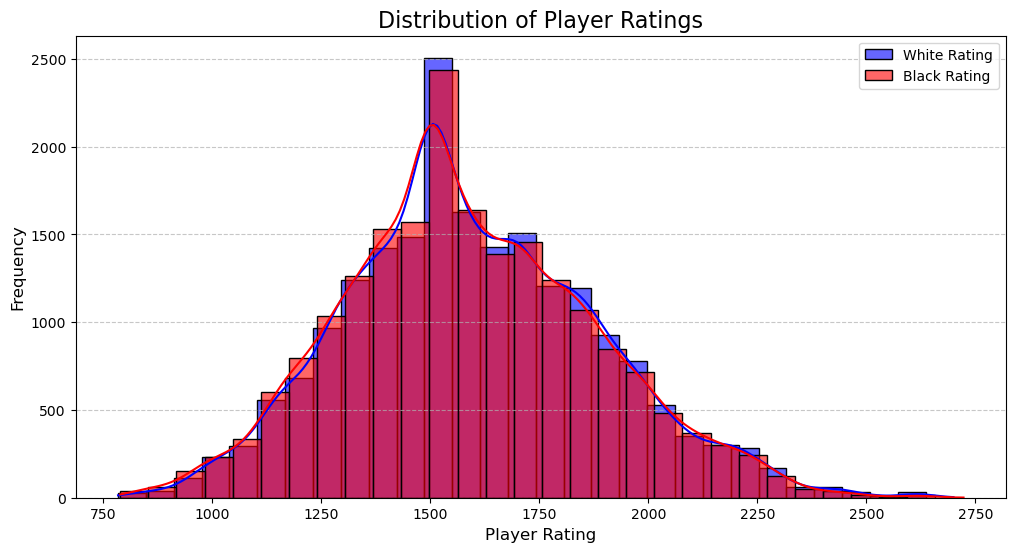

In [44]:
# Distribution of Player Ratings(White and Black)
plt.figure(figsize=(12, 6))
sns.histplot(chess_games['white_rating'], color='blue', label='White Rating', kde=True, bins=30, alpha=0.6)
sns.histplot(chess_games['black_rating'], color='red', label='Black Rating', kde=True, bins=30, alpha=0.6)
plt.title('Distribution of Player Ratings', fontsize=16)
plt.xlabel('Player Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_14052\3217320375.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=victory_counts.index, y=victory_counts.values, palette='Set2')


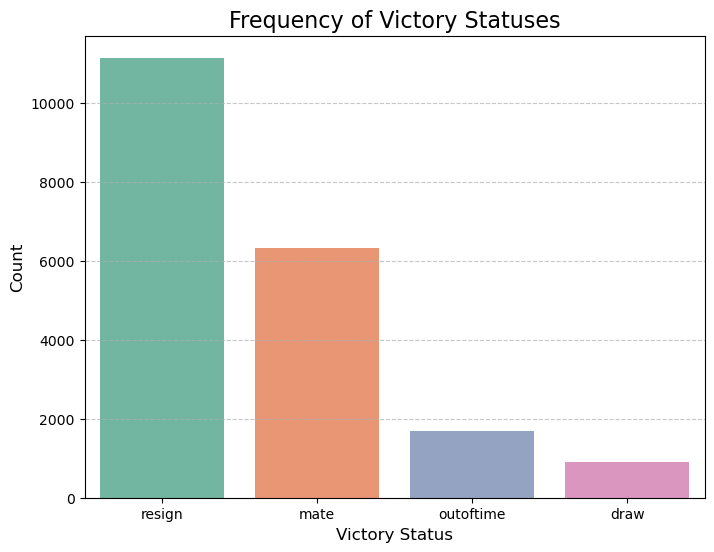

In [48]:
# Victory Statuses
plt.figure(figsize=(8, 6))
victory_counts = chess_games['victory_status'].value_counts()
sns.barplot(x=victory_counts.index, y=victory_counts.values, palette='Set2')
plt.title('Frequency of Victory Statuses', fontsize=16)
plt.xlabel('Victory Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_14052\1417306576.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=popular_openings.index, x=popular_openings.values, palette='viridis')


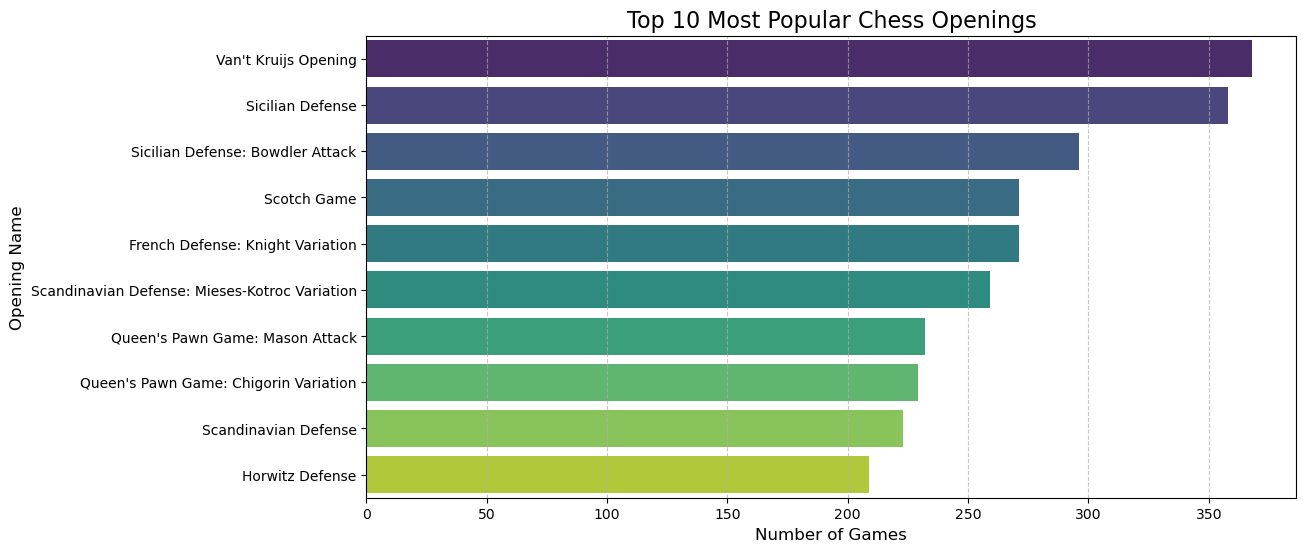

In [50]:
# Top 10 Most Popular Chess Openings
plt.figure(figsize=(12, 6))
popular_openings = chess_games['opening_name'].value_counts().head(10)
sns.barplot(y=popular_openings.index, x=popular_openings.values, palette='viridis')
plt.title('Top 10 Most Popular Chess Openings', fontsize=16)
plt.xlabel('Number of Games', fontsize=12)
plt.ylabel('Opening Name', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


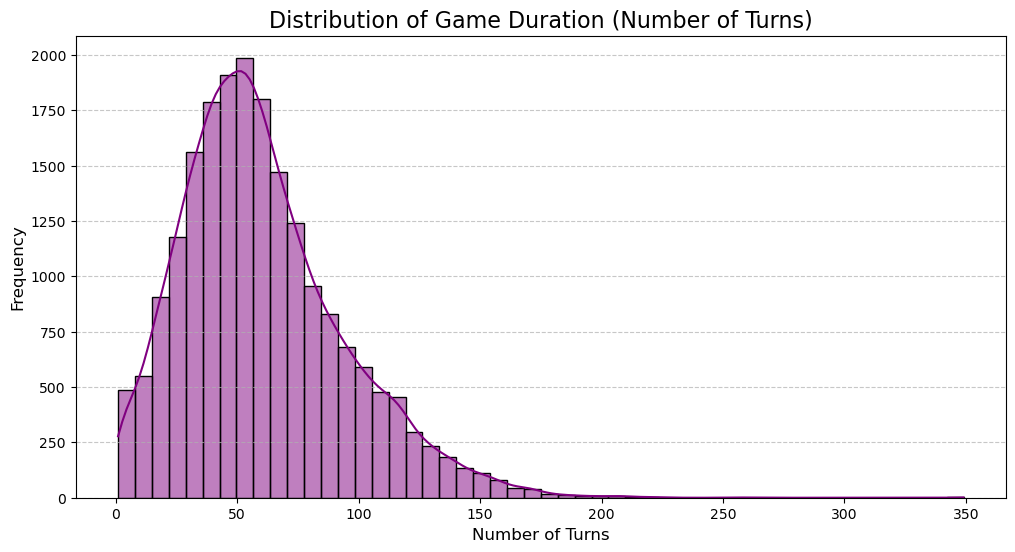

In [52]:
# Game Duration
plt.figure(figsize=(12, 6))
sns.histplot(chess_games['turns'], bins=50, kde=True, color='purple')
plt.title('Distribution of Game Duration (Number of Turns)', fontsize=16)
plt.xlabel('Number of Turns', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_14052\3990164893.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=winner_counts.index, y=winner_counts.values, palette='coolwarm')


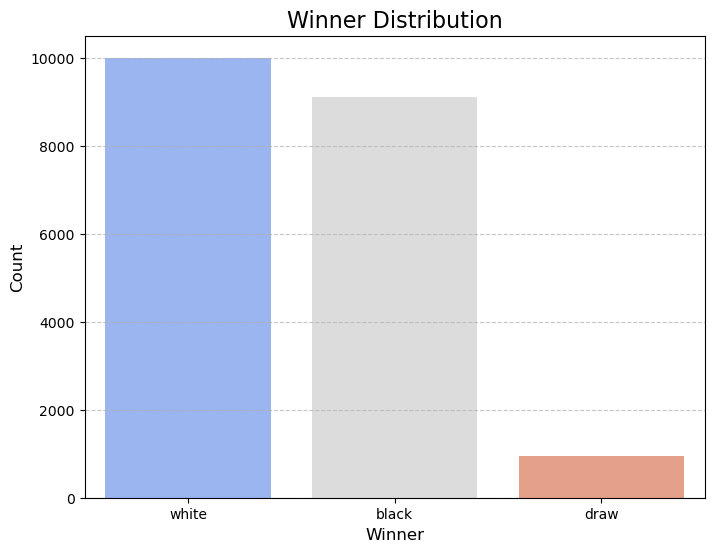

In [54]:
plt.figure(figsize=(8, 6))
winner_counts = chess_games['winner'].value_counts()
sns.barplot(x=winner_counts.index, y=winner_counts.values, palette='coolwarm')
plt.title('Winner Distribution', fontsize=16)
plt.xlabel('Winner', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
